In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

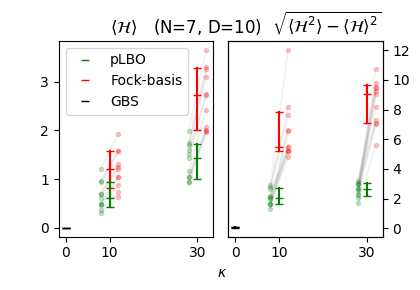

In [5]:
N7k10 = pd.read_csv("data_N7_D10_chi64_k10.csv")
N7k30 = pd.read_csv("data_N7_D10_chi64_k30.csv")

fig, ax = plt.subplots(figsize=(4,3),ncols=2,sharex=True)
ax[1].yaxis.set_visible(False)
offset = 2

ax[0].plot([0]*3,np.quantile(np.hstack([N7k10.EGBSs.__array__(),N7k30.EGBSs.__array__()]),(0.5-0.34,0.5,0.5+0.34)),color="k",marker="_")
ax[0].plot([10]*3,np.quantile(N7k10.Es.__array__(),(0.5-0.34,0.5,0.5+0.34)),color="r",marker="_")
ax[0].plot([10]*3,np.quantile(N7k10.Ekappas.__array__(),(0.5-0.34,0.5,0.5+0.34)),color="g",marker="_")
ax[0].plot([30]*3,np.quantile(N7k30.Es.__array__(),(0.5-0.34,0.5,0.5+0.34)),color="r",marker="_")
ax[0].plot([30]*3,np.quantile(N7k30.Ekappas.__array__(),(0.5-0.34,0.5,0.5+0.34)),color="g",marker="_")

ax[0].plot([10 + offset]*11,N7k10.Es.__array__(),color="r",marker=".",alpha=0.2,zorder=-1,ls="None")
ax[0].plot([10-offset]*11,N7k10.Ekappas.__array__(),color="g",marker=".",alpha=0.2,zorder=-1,ls="None")
ax[0].plot([30+offset]*11,N7k30.Es.__array__(),color="r",marker=".",alpha=0.2,zorder=-1,ls="None")
ax[0].plot([30-offset]*11,N7k30.Ekappas.__array__(),color="g",marker=".",alpha=0.2,zorder=-1,ls="None")

ax[0].plot(np.array([30 - offset, 30 + offset]*11).reshape(11,2).T,np.vstack([N7k30.Ekappas.__array__(),N7k30.Es.__array__()]),zorder=-20,alpha=0.05,color="k")
ax[0].plot(np.array([10 - offset, 10 + offset]*11).reshape(11,2).T,np.vstack([N7k10.Ekappas.__array__(),N7k10.Es.__array__()]),zorder=-20,alpha=0.05,color="k")


ax[0].set_xticks([0,10,30])
# ax[0].set_title(r"$\langle \mathcal{H}\rangle$")
ax[0].set_title(r"                   $\langle \mathcal{H}\rangle$   (N=7, D=10)")
ax[0].set_xlabel(r"                                       $\kappa$")
ax[0].plot([],[],marker="_",color="g",ls="None",label="pLBO")
ax[0].plot([],[],marker="_",color="r",ls="None",label="Fock-basis")
ax[0].plot([],[],marker="_",color="k",ls="None",label="GBS")
ax[0].legend(loc = "upper left", frameon=True)
################################################################################################
ax2 = ax[1].twinx()
ax2.plot([0]*3,np.quantile(np.hstack([N7k10.EGBSvars.__array__(),N7k30.EGBSvars.__array__()]),(0.5-0.34,0.5,0.5+0.34)),color="k",marker="_")
ax2.plot([10]*3,np.quantile(N7k10.Evars.__array__(),(0.5-0.34,0.5,0.5+0.34)),color="r",marker="_")
ax2.plot([10]*3,np.quantile(N7k10.Ekappavars.__array__(),(0.5-0.34,0.5,0.5+0.34)),color="g",marker="_")
ax2.plot([30]*3,np.quantile(N7k30.Evars.__array__(),(0.5-0.34,0.5,0.5+0.34)),color="r",marker="_")
ax2.plot([30]*3,np.quantile(N7k30.Ekappavars.__array__(),(0.5-0.34,0.5,0.5+0.34)),color="g",marker="_")

ax2.plot([10+offset]*11,N7k10.Evars.__array__(),color="r",marker=".",alpha=0.2,zorder=-1,ls="None")
ax2.plot([10-offset]*11,N7k10.Ekappavars.__array__(),color="g",marker=".",alpha=0.2,zorder=-1,ls="None")
ax2.plot([30+offset]*11,N7k30.Evars.__array__(),color="r",marker=".",alpha=0.2,zorder=-1,ls="None")
ax2.plot([30-offset]*11,N7k30.Ekappavars.__array__(),color="g",marker=".",alpha=0.2,zorder=-1,ls="None")

ax2.plot(np.array([30 - offset, 30 + offset]*11).reshape(11,2).T,np.vstack([N7k30.Ekappavars.__array__(),N7k30.Evars.__array__()]),zorder=-20,alpha=0.05,color="k")
ax2.plot(np.array([10 - offset, 10 + offset]*11).reshape(11,2).T,np.vstack([N7k10.Ekappavars.__array__(),N7k10.Evars.__array__()]),zorder=-20,alpha=0.05,color="k")


ax2.set_xticks([0,10,30])
ax2.set_title(r"        $\sqrt{\langle \mathcal{H}^2\rangle - \langle \mathcal{H}\rangle^2}$")
fig.tight_layout()
# fig.savefig("pLBO_Figures/Comparison_GS_pLBO_N7.pdf",bbox_inches="tight")

In [6]:
from tqdm import tqdm
import os
import json
D = 10
N = 7

folder_path = "./"
key = "basisparams_N7_D10_chi10_k10"
filenames_k10 = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) and f[:len(key)] == key]

key = "basisparams_N7_D10_chi10_k30"
filenames_k30 = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) and f[:len(key)] == key]

In [7]:
import strawberryfields as sf
def new_basis(basis_params,Dout=17):
    integrals_mat = np.zeros((Dout,D),dtype=np.complex128)
    for n in range(D):
        prog = sf.Program(1)
        with prog.context as q:
            sf.ops.Fock(n) | q[0]
            sf.ops.Kgate(basis_params["kappa"]) | q[0]
            sf.ops.Vgate(basis_params["gamma"]) | q[0]
            sf.ops.Pgate(basis_params["s"]) | q[0]
            sf.ops.Rgate(basis_params["theta"]) | q[0]
            sf.ops.Sgate(basis_params["r"],basis_params["phi"]) | q[0]
            sf.ops.Dgate(np.abs(basis_params["alpha"]),np.angle(basis_params["alpha"])) | q[0]

        eng = sf.Engine("fock", backend_options={"cutoff_dim": Dout})
        result = eng.run(prog)
        integrals_mat[:,n] = result.state.ket()
    return integrals_mat

In [8]:
def get_effective_cutoffs(filenames):
    Douts = np.arange(D,300)
    traces = np.zeros((len(filenames),N,len(Douts)))
    for k, filename in enumerate(filenames):
        print("File #",k,"/",len(filenames))
        with open(os.path.join(folder_path,filename), "r") as file:
            basis_params2 = json.load(file)
            basis_params = {key: item[-1] for key, item in basis_params2.items()}
            basis_params["alpha"] = [x + 1j * y for x,y in zip(basis_params["alpha_real"],basis_params["alpha_imag"])]
        for i in tqdm(range(N)):
            tmp = new_basis({key: basis_params[key][i] for key in basis_params.keys()},int(300))
            traces[k,i] = [np.trace(tmp[:i].T.conj()@tmp[:i])/D for i in range(D,300)]

    out = []
    counter = 0
    for i in range(traces.shape[0]):
        for j in range(traces.shape[1]):
            specW = 1 - traces[i,j]
            mask = (specW[:-1] - specW[1:]) < 1e-16
            out.append(Douts[1:][mask][0])
    return out
##### Comment #####
# Exactly how the effective cutoff is defined, i.e. the 'mask' variable above, can have a slight effect on the resulting plot.
###################
k10out = get_effective_cutoffs(filenames_k10)
k30out = get_effective_cutoffs(filenames_k30)

File # 0 / 11


100%|██████████| 7/7 [00:03<00:00,  2.06it/s]


File # 1 / 11


100%|██████████| 7/7 [00:06<00:00,  1.06it/s]


File # 2 / 11


100%|██████████| 7/7 [00:01<00:00,  4.38it/s]


File # 3 / 11


100%|██████████| 7/7 [00:01<00:00,  4.09it/s]


File # 4 / 11


100%|██████████| 7/7 [00:01<00:00,  4.12it/s]


File # 5 / 11


100%|██████████| 7/7 [00:01<00:00,  3.81it/s]


File # 6 / 11


100%|██████████| 7/7 [00:01<00:00,  3.99it/s]


File # 7 / 11


100%|██████████| 7/7 [00:01<00:00,  4.58it/s]


File # 8 / 11


100%|██████████| 7/7 [00:01<00:00,  3.53it/s]


File # 9 / 11


100%|██████████| 7/7 [00:01<00:00,  3.83it/s]


File # 10 / 11


100%|██████████| 7/7 [00:01<00:00,  3.69it/s]


File # 0 / 11


100%|██████████| 7/7 [00:02<00:00,  3.41it/s]


File # 1 / 11


100%|██████████| 7/7 [00:01<00:00,  3.83it/s]


File # 2 / 11


100%|██████████| 7/7 [00:01<00:00,  4.20it/s]


File # 3 / 11


100%|██████████| 7/7 [00:01<00:00,  4.46it/s]


File # 4 / 11


100%|██████████| 7/7 [00:01<00:00,  4.90it/s]


File # 5 / 11


100%|██████████| 7/7 [00:01<00:00,  3.54it/s]


File # 6 / 11


100%|██████████| 7/7 [00:02<00:00,  3.34it/s]


File # 7 / 11


100%|██████████| 7/7 [00:01<00:00,  3.92it/s]


File # 8 / 11


100%|██████████| 7/7 [00:01<00:00,  4.19it/s]


File # 9 / 11


100%|██████████| 7/7 [00:01<00:00,  3.97it/s]


File # 10 / 11


100%|██████████| 7/7 [00:01<00:00,  3.81it/s]


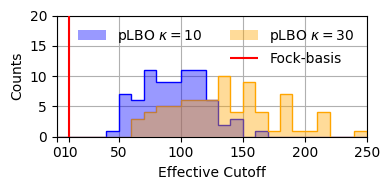

In [9]:
fig, ax = plt.subplots(figsize=(4,2))
ax.grid()
Nbins = 25

ax.hist(k10out,bins=Nbins,range=(0,250),color='blue',alpha=1,zorder=10,histtype="step")
ax.hist([k30out],bins=Nbins,range=(0,250),color='orange',alpha=1,zorder=10,histtype="step")

ax.hist(k10out,bins=Nbins,range=(0,250),color='blue',alpha=0.4,zorder=10,histtype="bar",label=r"pLBO $\kappa=10$")
ax.hist([],color="white",alpha=0,label=" ")
ax.hist([k30out],bins=Nbins,range=(0,250),color='orange',alpha=0.4,zorder=10,histtype="bar",label=r"pLBO $\kappa=30$")
ax.vlines(10,0,30,ls='-',color='red',zorder=10,label=r"Fock-basis")

ax.set_ylim(0,20)
ax.set_xticks([0,10,50,100,150,200,250])
ax.set_xlim(0,250)
ax.legend(frameon=False,ncol=2)
ax.set_xlabel("Effective Cutoff")
ax.set_ylabel("Counts")
fig.tight_layout()